<a href="https://colab.research.google.com/github/Lu-Brito/Data-literacy-learning-design-through-popular-education/blob/main/time_series_disorderly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/Lu-Brito/Data-literacy-learning-design-through-popular-education/main/mapeamento%20sistem%C3%A1tico%20-%20C%C3%B3pia%20de%20P%C3%A1gina12(1).csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

print(df)



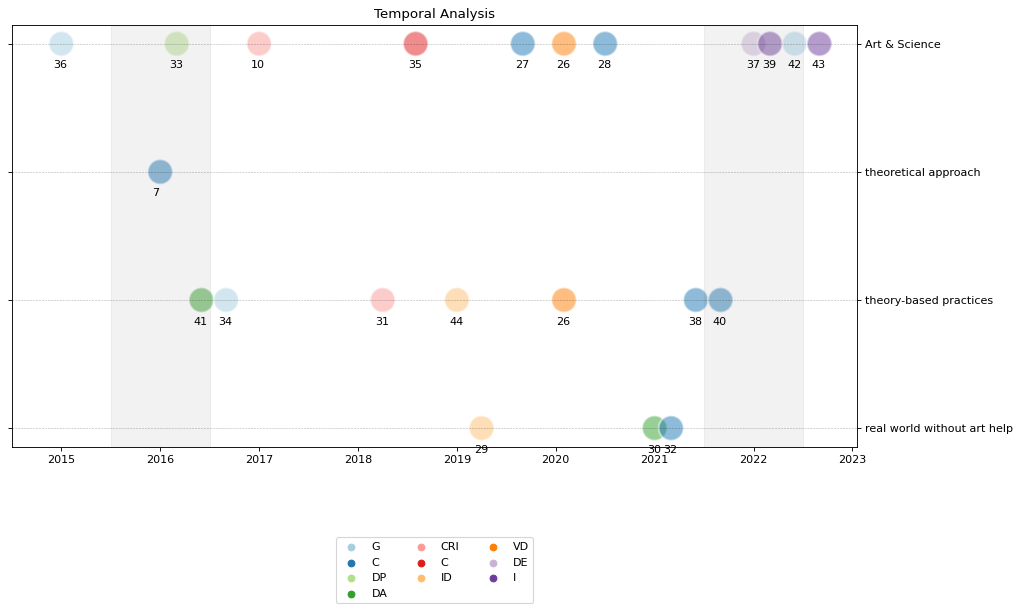

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/Lu-Brito/Data-literacy-learning-design-through-popular-education/main/mapeamento_sistem%C3%A1tico_datas_modificadas2%20-%20C%C3%B3pia%20de%20P%C3%A1gina12(1).csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = df['date'].apply(lambda x: x.year + (x.month-1)/12)
years = df['year'].unique()

# Define a dictionary that maps the original value names to the new names
value_names = {'AC': 'Art & Science', 'AMR': 'real world without art help', 'PBT':'theory-based practices','T':'theoretical approach'}

# Use the map() function to replace the original values with the new names
df['value'] = df['value'].map(value_names)


# Set the x-ticks and labels
axes[0].set_xticks(x_ticks)
axes[0].set_xticklabels(x_labels)

# Set x-axis limits
axes[0].set_xlim(2015, 2022)

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(30,7), dpi= 80)

sns.scatterplot(x='year', y='value', hue='value_1', palette='Paired', s=500, alpha=0.5, data=df, ax=axes[0], legend=True)

# Remove x-axis and y-axis titles
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# Move y-axis labels to the right
axes[0].tick_params(labelright=True)
axes[0].tick_params(labelleft=False)

# Move y-axis ticks and labels to the right
axes[0].tick_params(labelright=True, right=True)

# Set x-axis limits
axes[0].set_xlim(2015 -0.5, None)

# Set Title and Font Style
axes[0].set_title('Temporal Analysis', fontsize=12, color='black'); 

# Add grid shadows for years with even last digit
for year in years:
    if year % 2 == 0:
        axes[0].axvspan(year-0.5, year+0.5, alpha=0.1, color='gray')

# Add data from "referencia" column as text inside each dot
for index, row in df.iterrows():
    axes[0].annotate(row['referencia'], xy=(row['year'], row['value']), xytext=(-7,-22), color='black', textcoords='offset points')

# Remove the second subplot
fig.delaxes(axes[1])

# Add grid lines
axes[0].grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

# Adjust legend position
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

plt.show()
